## Loss

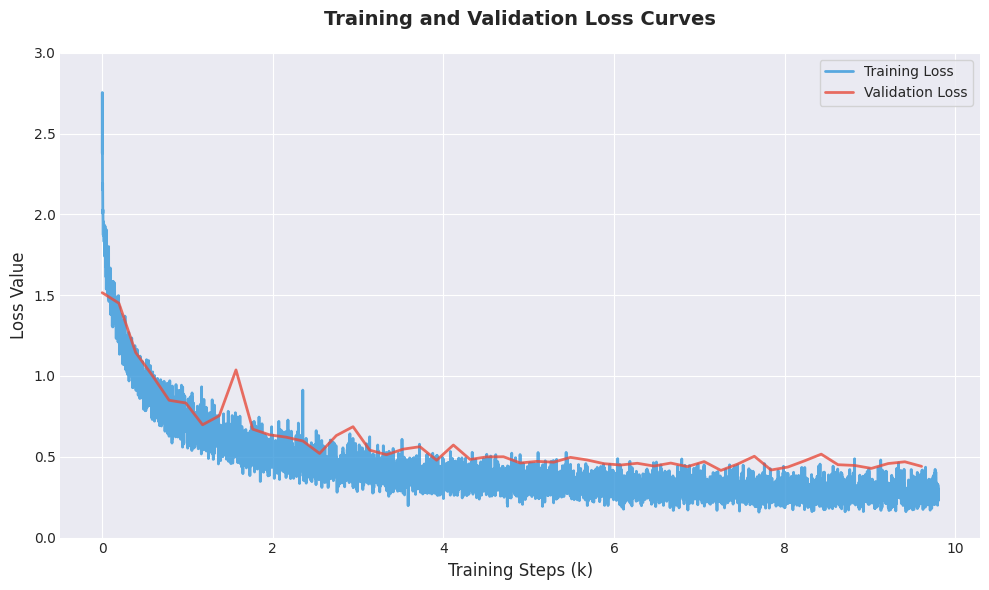

In [5]:
import numpy as np
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import os

# 设置绘图风格
plt.style.use('seaborn-v0_8-darkgrid')

# 读取tensorboard记录
name = "vgg_bn_0.003"
ea = event_accumulator.EventAccumulator('/home/blimber/homework/DATA130011-PJ2/runs/20250530_024722/tensorboard/events.out.tfevents.1748544442.f3a5336ec738.2085387.0')
ea.Reload()

# 获取训练和验证损失数据
train_loss = [(s.step, s.value) for s in ea.Scalars('train/batch_loss')]
val_loss = [(s.step, s.value) for s in ea.Scalars('val/epoch_loss')]
train_accuracy = [(s.step, s.value) for s in ea.Scalars('train/epoch_accuracy')]
val_accuracy = [(s.step, s.value) for s in ea.Scalars('val/epoch_accuracy')]

# 重组
train_steps, train_values = zip(*train_loss)
val_steps, val_values = zip(*val_loss)

train_epochs, train_acc = zip(*train_accuracy)
val_epochs, val_acc = zip(*val_accuracy)


# 计算每个epoch的step数
steps_per_epoch = np.ceil(50000/256)  # CIFAR10训练集大小为50000,batch_size=256
val_steps_converted = [step * steps_per_epoch for step in range(len(val_values))]

# 将steps转换为k单位(千步)
train_steps_k = [step/1000 for step in train_steps]
val_steps_k = [step/1000 for step in val_steps_converted]

# 创建画布和子图
plt.figure(figsize=(10, 6))

# 绘制损失曲线
plt.plot(train_steps_k, train_values, label='Training Loss', 
                    linewidth=2, color='#3498DB', alpha=0.8)
plt.plot(val_steps_k, val_values, label='Validation Loss',
                   linewidth=2, color='#E74C3C', alpha=0.8)

# 设置标签和标题
plt.xlabel('Training Steps (k)', fontsize=12)
plt.ylabel('Loss Value', fontsize=12)
plt.title('Training and Validation Loss Curves', 
             fontsize=14, fontweight='bold', pad=20)

# 自定义图例
plt.legend(loc='upper right', fontsize=10, frameon=True)
    
# 设置y轴从0开始
plt.ylim((0, 3))

plt.tight_layout()

plt.savefig(f'imgs/{name}_loss.pdf')
plt.show()


## Accuracy

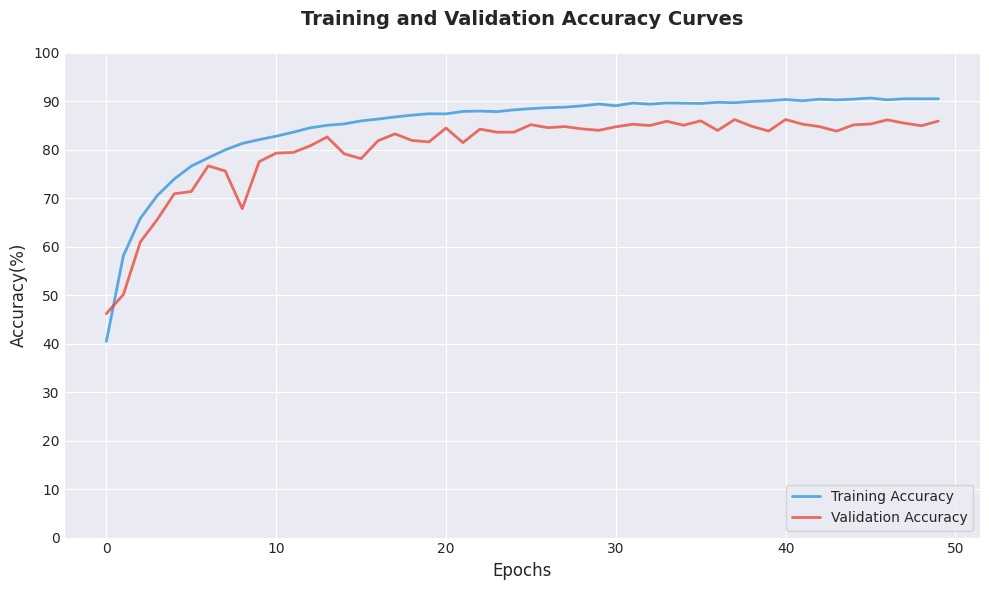

In [6]:
# 创建画布和子图
plt.figure(figsize=(10, 6))

# 绘制准确率曲线
plt.plot(train_epochs, train_acc, 
                        label='Training Accuracy',
                        linewidth=2, color='#3498DB', alpha=0.8)
plt.plot(val_epochs, val_acc,
                       label='Validation Accuracy',
                       linewidth=2, color='#E74C3C', alpha=0.8)

# 设置标签和标题
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy(%)', fontsize=12)
plt.title('Training and Validation Accuracy Curves',
             fontsize=14, fontweight='bold', pad=20)

# 自定义图例
plt.legend(loc='lower right', fontsize=10, frameon=True)
# 设置y轴网格线
plt.yticks(range(0, 101, 10))
# plt.grid(axis='y', linestyle='--', alpha=0.3)

# 设置y轴范围在0-1之间
plt.ylim(0, 100)

plt.tight_layout()

plt.savefig(f'imgs/{name}_acc.pdf')
plt.show()


## Loss Landscape

(1, 9800) (1, 9800)
(2, 9800) (1, 9800)
(3, 9800) (1, 9800)
1.2141820192337036
(1, 9800) (1, 9800)
(2, 9800) (1, 9800)
(3, 9800) (1, 9800)


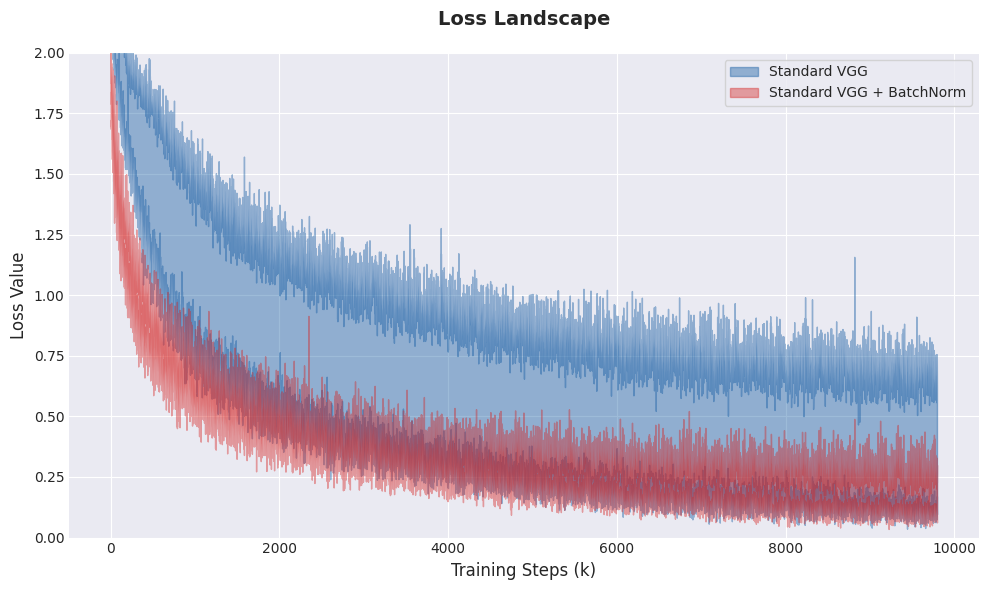

In [1]:
import seaborn as sns
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np
# 设置绘图风格
plt.style.use('seaborn-v0_8-darkgrid')

files_wobn = [
    "/home/blimber/homework/DATA130011-PJ2/runs/20250530_023837/tensorboard/events.out.tfevents.1748543917.f3a5336ec738.1929224.0",
    "/home/blimber/homework/DATA130011-PJ2/runs/20250530_023850/tensorboard/events.out.tfevents.1748543930.f3a5336ec738.1933335.0",
    "/home/blimber/homework/DATA130011-PJ2/runs/20250530_024158/tensorboard/events.out.tfevents.1748544118.f3a5336ec738.1992828.0",
    "/home/blimber/homework/DATA130011-PJ2/runs/20250530_024334/tensorboard/events.out.tfevents.1748544214.f3a5336ec738.2016025.0",
]
files_wbn = [
    "/home/blimber/homework/DATA130011-PJ2/runs/20250530_024449/tensorboard/events.out.tfevents.1748544289.f3a5336ec738.2030830.0",
    "/home/blimber/homework/DATA130011-PJ2/runs/20250530_024523/tensorboard/events.out.tfevents.1748544323.f3a5336ec738.2041477.0",
    "/home/blimber/homework/DATA130011-PJ2/runs/20250530_024722/tensorboard/events.out.tfevents.1748544442.f3a5336ec738.2085387.0",
    "/home/blimber/homework/DATA130011-PJ2/runs/20250530_024812/tensorboard/events.out.tfevents.1748544492.f3a5336ec738.2105804.0",
]

# 读取tensorboard记录

def get_min_max(files):
    train_loss_all = None
    for f in files:
        ea = event_accumulator.EventAccumulator(f)
        ea.Reload()
        # 获取训练和验证损失数据
        train_loss = [(s.step, s.value) for s in ea.Scalars('train/batch_loss')]
        # 重组
        train_steps, train_values = zip(*train_loss)
        # To numpy array
        train_values = np.expand_dims(np.array(train_values), axis=0)
        # concate
        if train_loss_all is not None:
            print(train_loss_all.shape, train_values.shape)
            train_loss_all = np.concatenate([train_loss_all, train_values], axis=0)
        else:
            train_loss_all = train_values

    min_loss = np.min(train_loss_all, axis=0)
    max_loss = np.max(train_loss_all, axis=0)

    return min_loss, max_loss, train_steps

min_wobn, max_wobn, train_steps = get_min_max(files_wobn)
print(max_wobn[2000])
min_wbn, max_wbn, _  = get_min_max(files_wbn)


# 将steps转换为k单位(千步)
train_steps_k = [step/1000 for step in train_steps]

# 创建画布和子图
plt.figure(figsize=(10, 6))

# 绘制损失曲线
plt.fill_between(train_steps, min_wobn, max_wobn, 
                 color=sns.color_palette("Blues")[5], alpha=0.4, label="Standard VGG")
plt.fill_between(train_steps, min_wbn, max_wbn, 
                 color=sns.color_palette("Reds")[4], alpha=0.4, label="Standard VGG + BatchNorm")

# 设置标签和标题
plt.xlabel('Training Steps (k)', fontsize=12)
plt.ylabel('Loss Value', fontsize=12)
plt.title('Loss Landscape', 
             fontsize=14, fontweight='bold', pad=20)

# 自定义图例
plt.legend(loc='upper right', fontsize=10, frameon=True)
    
# 设置y轴从0开始
plt.ylim(0, 2)

plt.tight_layout()
plt.savefig('imgs/loss_landscape.pdf')
plt.show()
